In [2]:
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastprogress import fastprogress
from torchvision.models import *

In [38]:
def fit_with_annealing(learn:Learner, num_epoch:int, lr:float=defaults.lr, annealing_start:float=0.5)->None:
    
    n = len(learn.data.train_dl)
    anneal_start = int(n*num_epoch*annealing_start)
    
    
    phase0 = TrainingPhase(anneal_start).schedule_hp('lr', lr)
    phase1 = TrainingPhase(n*num_epoch - anneal_start).schedule_hp('lr', lr, anneal=annealing_cos)

    phases = [phase0, phase1]
    sched = GeneralScheduler(learn, phases)
    learn.callbacks.append(sched)
    learn.fit(num_epoch)

In [39]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = Learner(data, simple_cnn((3,16,16,2)), metrics=[accuracy, error_rate])

In [40]:
fit_with_annealing(learn, 4, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.162849,0.140958,0.949460,0.050540,00:03
1,0.125455,0.115981,0.959764,0.040236,00:06
2,0.107564,0.104346,0.965162,0.034838,00:05
3,0.101421,0.097576,0.964181,0.035819,00:04


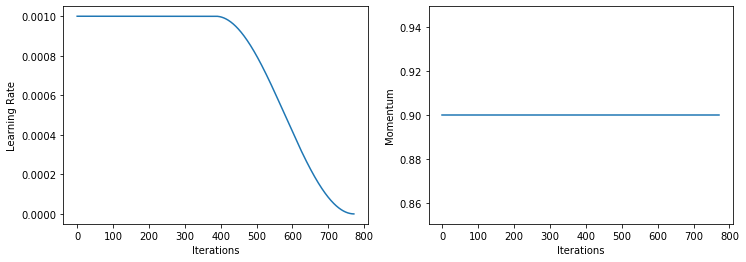

In [41]:
learn.recorder.plot_lr(show_moms=True)